<a href="https://colab.research.google.com/github/eduardoprospero/IC-ENEM/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória

## Banco de Dados

Aqui faremos a leitura e a análise dos microdados do Enem 2019. Esses dados são muito grandes (2,98GB) e não é possível abrí-los diretamente pelo colab, pois esgota-se toda a RAM dísponível. Assim, a primeira coisa que faremos é decidir quais colunas usaremos e em seguida a cor da prova que será nossa amostra.


O Enem segue o seguinte formato:
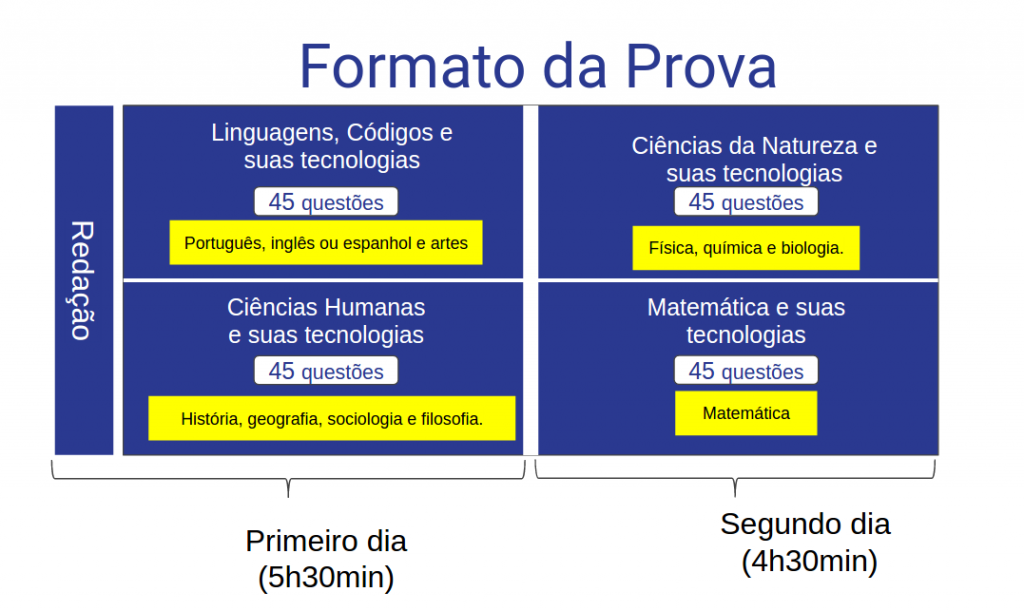

No nosso caso teremos 50 questões de Linguagens e Códigos, sendo as 5 primeiras 
questões referente a língua inglesa e as 5 seguintes espanhola.
O aluno que escolheu Inglês terá suas respostas de Espanhol como cinco '9' seguidos e vice-versa.

Imports necessários

In [ ]:
#Imports
import csv
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

np.set_printoptions(suppress=True)

In [ ]:
#Liberar acesso ao drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Conhecendo nosso banco de dados

In [ ]:
#Explorando tudo que tem dentro do arquivo

with zipfile.ZipFile('/content/drive/Shareddrives/IC_Edu_Julie/Dados/microdados_enem_2019.zip') as z:
    print(*z.namelist(),sep="\n")

----------------------------------
Para facilitar a compreensão de cada sigla deixo o dicionário de fácil acesso:

https://uspbr-my.sharepoint.com/:x:/g/personal/juliecamolesi_usp_br/EfMqVG3fsiRMv0OxGhNWnwQByMLxx7-6zAPo4C0jAR1mMg?e=3hE0JI

-------------------------------------

In [ ]:
#Chamando o banco dedados apenas com os índices
# sem valores
with zipfile.ZipFile('/content/drive/Shareddrives/IC_Edu_Julie/Dados/microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
        df = pd.read_csv(f,sep=';',encoding='ISO-8859-1', nrows=0)

In [ ]:
#Identificando índices
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
#Quantidade de índices
len(df.columns)

136

In [ ]:
#Selecionando índices que usaremos
columns=['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO',  'TP_COR_RACA', 'CO_MUNICIPIO_RESIDENCIA', 'CO_MUNICIPIO_PROVA',
       'TP_ESCOLA', 'TP_ENSINO', 'SG_UF_PROVA',                                                   #algumas informações sociais 
       'IN_TREINEIRO',                                                              #se é treineiro
       'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_CH', 'CO_PROVA_MT',                  #cor da prova
       'TP_PRESENCA_CN','TP_PRESENCA_MT','TP_PRESENCA_LC','TP_PRESENCA_CH',         #presença por dia
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',   #vetor de respostas
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',                      #nota por area
       'TP_LINGUA',                                                                 #ingles(0) ou espanhol(1)
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC','TX_GABARITO_MT',       #vetor gabarito
       'NU_NOTA_REDACAO']                                                           #nota na redação
len(columns)

32

----------------------------------------------

Areas de conhecimento:

-Primeiro dia:

LC= Linguagens, Códigos e suas Tecnologias.

CH = Ciências Humanas e suas Tecnologias.

-Segundo dia:

CN = Ciências da Natureza e suas Tecnologias.

MT= Matemática e suas Tecnologias.

----------------------------------------------

In [ ]:
#Chamando o banco de dados novamente, agora apenas com os indices desejados
with zipfile.ZipFile('/content/drive/Shareddrives/IC_Edu_Julie/Dados/microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
        df = pd.read_csv(f,sep=';',encoding='ISO-8859-1', usecols=columns, dtype=str)

In [ ]:
#Quantidade de observações
t=len(df)
t

5095270

###Visualizando nosso banco de dados
Aqui ainda não foi retirada a amostra, ou seja, temos todas as cores de provas presente, apenas com menos colunas. Antes de tirar a amostra vamos examiná-lo por inteiro.

In [ ]:
df

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,...,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
0,190001595656,3552205,36,M,3,1,NaN,0,0,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,190001421546,2910800,23,M,1,1,1,0,0,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,190001133210,2304400,39,F,3,1,1,0,0,0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,190001199383,1721000,25,F,1,1,NaN,0,1,1,...,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,460
4,190001237802,3118601,22,F,1,1,1,0,1,1,...,EEBEDEEEEEBDCEEBEEEEABEEBEEBAEDEECECCDBCECEAE,EEDCCEDDBCBEABAAABADCEDABDBBCBDCCCCDAEDEDBDCB,ABBBE99999ABBCACCCAEEEDCCDADCCAEDEDDEEDBBDECBD...,CDEEEEEAEECBABABCDCACEEEEEEDEEACEAEDEBEEECEDE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,190006074437,5300108,41,F,3,1,NaN,0,0,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5095266,190005429225,1302603,20,M,3,1,NaN,0,0,1,...,NaN,DAABAEACCBAEADBDCAEDBDEBCEBAECEBBDBBEEABCDADC,99999CABEABCCBCDBAEBBAADBECCEEAADBEEDDEACDCBCE...,NaN,1,NaN,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,NaN,500
5095267,190006087652,4302105,21,M,0,1,NaN,0,0,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5095268,190006087653,4302105,22,M,0,1,NaN,0,0,0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


####Treineiros

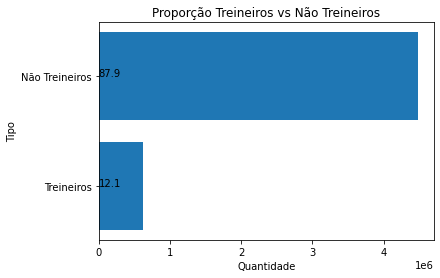

In [ ]:
y=['Treineiros', 'Não Treineiros'] 
x=[len(df[df['IN_TREINEIRO'] == '1']),len(df[df['IN_TREINEIRO'] == '0'])]  
plt.barh(y, x) 
plt.ylabel("Tipo") 
plt.xlabel("Quantidade")  
plt.title("Proporção Treineiros vs Não Treineiros") 

plt.annotate(round(len(df[df['IN_TREINEIRO'] == '0'])*100/t,2), (1,1))

plt.annotate(round(len(df[df['IN_TREINEIRO'] == '1'])*100/t,2), (0,0))

plt.show()

####Sexo

In [ ]:
#Seus respectivos tamanhos
f=df[df['TP_SEXO'] == 'F']
m=df[df['TP_SEXO'] == 'M']

In [ ]:
ft=f[f['IN_TREINEIRO'] == '1']
mt=m[m['IN_TREINEIRO'] == '1']

In [ ]:
fnt=f[f['IN_TREINEIRO'] == '0']
mnt=m[m['IN_TREINEIRO'] == '0']

In [ ]:
#Montando o banco de dados no formato ideal para o plot:
df_grap = pd.DataFrame([['Feminino', 'Treineiro',round(len(ft)*100/len(df[df['IN_TREINEIRO'] == '1']), 2)],
                   ['Feminino', 'Não Treineiro', round(len(fnt)*100/len(df[df['IN_TREINEIRO'] == '0']), 2)],
                   ['Masculino','Treineiro',round(len(mt)*100/len(df[df['IN_TREINEIRO'] == '1']),2)],
                   ['Masculino','Não Treineiro', round(len(mnt)*100/len(df[df['IN_TREINEIRO'] == '0']),2)]], 
                   columns=['Sexo','Tipo','Proporção'])

df_grap

,Sexo,Tipo,Proporção
0,Feminino,Treineiro,62.82
1,Feminino,Não Treineiro,59.05
2,Masculino,Treineiro,37.18
3,Masculino,Não Treineiro,40.95


In [ ]:
import plotly.express as px

In [ ]:
#Gráfico do Tamanho de Cada Amostra
fig = px.bar(df_grap, x="Proporção", y="Tipo",
             color='Sexo', barmode='group',text="Proporção",
             title='Gráfico de porcentagem de sexo em treineiros e não treineiros', orientation='h')
fig.show()

####Presença

In [ ]:
#Faltaram nas duas etapas 
faltaram=df[df['TP_PRESENCA_MT'] == '0']
faltaram_mesmo = faltaram[faltaram['TP_PRESENCA_LC'] == '0']


#Faltaram apenas no dia 1
faltaramd1 = df[df['TP_PRESENCA_LC'] == '0']
faltaram_d1 = faltaramd1[faltaramd1['TP_PRESENCA_MT'] == '1']


#Faltaram apenas no dia 2
faltaram_d2 = faltaram[faltaram['TP_PRESENCA_LC'] == '1']

In [ ]:
##treineiros
#Faltaram nas duas etapas
# faltaram_ntrei = faltaram[faltaram['IN_TREINEIRO'] == '0']
faltaram_mesmo_trei = faltaram_mesmo[faltaram_mesmo['IN_TREINEIRO']== '1']

#Faltaram apenas no dia 1
# faltaramd1_ntrei = faltaramd1[faltaramd1['IN_TREINEIRO'] == '0']
faltaram_d1_trei = faltaram_d1[faltaram_d1['IN_TREINEIRO'] == '1']

#Faltaram apenas no dia 2
# faltaramd2_ntrei = faltaramd2[faltaramd2['IN_TREINEIRO'] == '0']
faltaram_d2_trei = faltaram_d2[faltaram_d2['IN_TREINEIRO'] == '1']

In [ ]:
##Nao treineiros
#Faltaram nas duas etapas
# faltaram_ntrei = faltaram[faltaram['IN_TREINEIRO'] == '0']
faltaram_mesmo_ntrei = faltaram_mesmo[faltaram_mesmo['IN_TREINEIRO']== '0']

#Faltaram apenas no dia 1
# faltaramd1_ntrei = faltaramd1[faltaramd1['IN_TREINEIRO'] == '0']
faltaram_d1_ntrei = faltaram_d1[faltaram_d1['IN_TREINEIRO'] == '0']

#Faltaram apenas no dia 2
# faltaramd2_ntrei = faltaramd2[faltaramd2['IN_TREINEIRO'] == '0']
faltaram_d2_ntrei = faltaram_d2[faltaram_d2['IN_TREINEIRO'] == '0']

In [ ]:
trei=[ len(faltaram_mesmo_trei)*100/round(len(strei)), len(faltaram_d1_trei)*100/round(len(strei)), len(faltaram_d2_trei)*100/round(len(strei))]

In [ ]:
ntrei=[len(faltaram_mesmo_ntrei)*100/round(len(sntrei)), len(faltaram_d1_ntrei)*100/round(len(sntrei)), len(faltaram_d2_ntrei)*100/round(len(sntrei))]

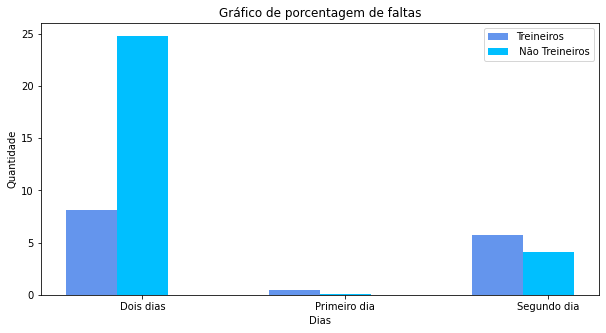

In [ ]:
#aumentando o gráfico
plt.figure(figsize=(10,5))

#Definindo a largura das barras
barWidth = 0.25

#definindo a posição das barras
r1 = np.arange(len(trei))
r2= [x + barWidth for x in r1]

#criando as barras
plt.bar(r1, trei, color='#6495ED', width= barWidth, label= 'Treineiros')
plt.bar(r2, ntrei, color='#00BFFF', width= barWidth, label= ' Não Treineiros')

#adicionando legendas as barras
plt.xlabel("Dias")
plt.xticks([r + barWidth for r in range(len(trei))], ['Dois dias', "Primeiro dia", 'Segundo dia'])
plt.ylabel('Quantidade')
plt.title('Gráfico de porcentagem de faltas')
plt.legend()

plt.show()

####Cor

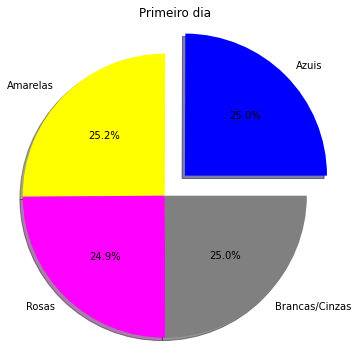

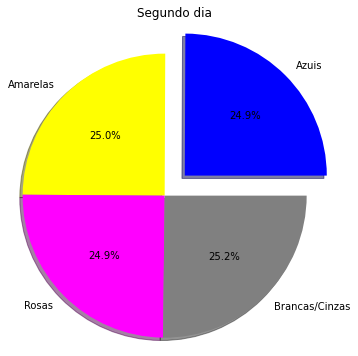

In [ ]:
##Proporção de cores de prova por dia
#Dia 1
labels = ['Azuis', 'Amarelas', 'Rosas', 'Brancas/Cinzas']
proportiond1 = [len(df[df['CO_PROVA_LC'] == '511']),len(df[df['CO_PROVA_LC'] == '512']), len(df[df['CO_PROVA_LC'] == '513']),len(df[df['CO_PROVA_LC'] == '514'])]
exploded1 = (0.2, 0, 0, 0)
cores = ['blue', 'yellow', 'fuchsia', 'grey']

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(proportiond1, explode = exploded1, labels = labels, autopct='%1.1f%%',
        shadow = True, colors = cores)
plt.title('Primeiro dia')
ax1.axis('equal')
plt.show()

#Dia 2
proportiond2 = [len(df[df['CO_PROVA_MT'] == '515']), len(df[df['CO_PROVA_MT'] == '516']), len(df[df['CO_PROVA_MT'] == '517']), len(df[df['CO_PROVA_MT'] == '518'])]
cores = ['blue', 'yellow', 'fuchsia', 'grey']

fig2, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(proportiond2, explode = exploded1, labels = labels, autopct='%1.1f%%',
        shadow = True, colors = cores)
plt.title('Segundo dia')
ax1.axis('equal')
plt.show()

Podemos ver acima que as proporções de cores das provas são igualmente distribuídas, orbitando em 25%.

Provas Brancas/Cinzas são representadas juntas pois no primeiro dia de aplicação de provas essa parcela é branca e no segundo dia é cinza.

Com esse gráfico decidimos que a proporção de provas azuis é suficiente para ser nossa amostra e assim representará todo o banco de dados.

##Amostra

Como dito anteriormente nossa amostra será a dos alunas cuja cor da prova é azul, mas além disso também aplicaremos um filtro excluindo os treineiros e selecionando apenas alunos que compareceram nos dois dias de prova.

###Seleção

In [ ]:
#Compareceram nas duas etapas 
compareceram=df[df['TP_PRESENCA_MT'] == '1']
compareceram_mesmo=compareceram[compareceram['TP_PRESENCA_LC'] == '1']

compareceram_trei = compareceram[compareceram['IN_TREINEIRO'] == '0']
compareceram_mesmo_trei = compareceram_mesmo[compareceram_mesmo['IN_TREINEIRO']== '0']

azulD1=compareceram_mesmo_trei[compareceram_mesmo_trei['CO_PROVA_LC'] == '511']

# print('Compareceram nas duas etapas, não são treineiros e a prova do primeiro dia é azul=',len(azulD1),'(', (len(azulD1))*100/t,'%)' )


In [ ]:
azulD2=compareceram_mesmo_trei[compareceram_mesmo_trei['CO_PROVA_MT'] == '515']

####Salvando no Drive

In [ ]:
#Separar num .CSV e salvar no drive
azulD1.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/amostra_D1.csv')
azulD2.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/amostra_D2.csv')

###Conhendo nossa amostra

####Língua

Faremos uma analise mais aprofundada entre a lingua que o candidato escolheu e o tipo de ensino que ele teve. Essa análise encontra-se num código a parte: Tabela de dupla entrada.

####Redação

In [ ]:
#Desempenho da redaçao por sexo
duas = ['TP_SEXO','NU_NOTA_REDACAO']
teste = azulD1.filter(items=duas)
teste.head()

,TP_SEXO,NU_NOTA_REDACAO
11,M,500
22,M,500
28,F,580
46,F,860
55,F,260


In [ ]:
#Quantas pessoas fizeram a prova azul por gênero
teste.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,466348
M,324329


In [ ]:
#convertendo os numeros para inteiros
teste["NU_NOTA_REDACAO"] = pd.to_numeric(teste["NU_NOTA_REDACAO"])

In [ ]:
#Funçao pra descrição
teste.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                          ...                      
                  count        mean         std  ...    50%    75%     max
TP_SEXO                                          ...                      
F              466348.0  586.083225  182.074259  ...  580.0  680.0  1000.0
M              324329.0  571.163911  182.965763  ...  580.0  680.0  1000.0

[2 rows x 8 columns]

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

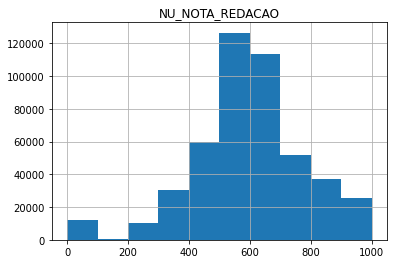

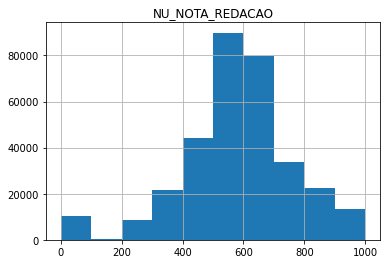

In [ ]:
#Histograma da nota na redaçao por sexo
teste.groupby('TP_SEXO').hist()

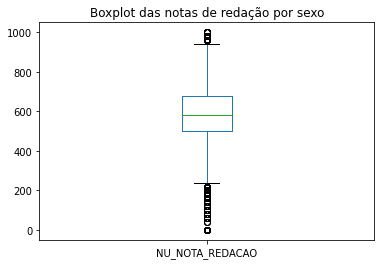

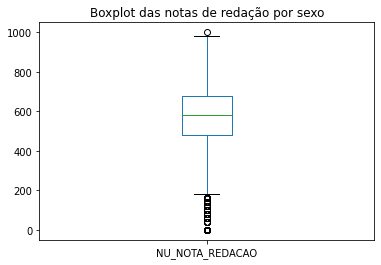

In [ ]:
#Boxplot das notas de redação por sexo
grupo = teste.groupby('TP_SEXO')
grupo.plot(kind = "box", title = "Boxplot das notas de redação por sexo")
plt.show()

###Chamando a amostra

Agora que temos o banco de dados da amostra salvo no drive podemos chamá-lo diretamente, para não ter que repetir os passos anteriores.

In [ ]:
#Importando as amostras do drive
azulD1 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/amostra_D1.csv")
azulD2 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/amostra_D2.csv")

azulD1 = azulD1.drop(columns=['Unnamed: 0'])
azulD2 = azulD2.drop(columns=['Unnamed: 0'])

In [ ]:
len(azulD1)/5095270
    

0.1551786264515914

In [ ]:
len(azulD2)/5095270

0.15521277577046946

###Testes com gráficos diferenciados

####Gráfico interativo da idade

In [ ]:
##Gráficos bonitos e interativos 
#NÃO RODAR se não for fazê-los!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!pip install -U plotly

     |████████████████████████████████| 27.7 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
#Idade na primeira etapa da nossa amostra
azulD1.NU_IDADE.value_counts().sort_index().plot(kind='bar')

In [ ]:
#Idade na segunda etapa da nossa amostra
azulD2.NU_IDADE.value_counts().sort_index().plot(kind='bar')

####Gráfico do formato do mapa do Brasil

In [ ]:
#Importando a posiçao geografica dos municipios pra fazer o grafico de mapa
with open('/content/drive/Shareddrives/IC_Edu_Julie/Dados/municipios.csv.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('mun.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)

In [ ]:
#Lendo o dataset e importando os codigos de municipio
municipios= pd.read_csv('mun.csv')
municipios["codigo_ibge"] = pd.to_numeric(municipios["codigo_ibge"])

In [ ]:
#TRANSFORMANDO OS VALORES EM NUMEROS
##MUITO IMPORTANTE!
azulD1['CO_MUNICIPIO_RESIDENCIA']=pd.to_numeric(azulD1['CO_MUNICIPIO_RESIDENCIA'])
azulD2['CO_MUNICIPIO_RESIDENCIA']=pd.to_numeric(azulD2['CO_MUNICIPIO_RESIDENCIA'])

In [ ]:
juntando= pd.merge(azulD1, municipios, 
                   how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'],
                   right_on=['codigo_ibge'])
juntando2= pd.merge(azulD2, municipios, 
                   how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'],
                   right_on=['codigo_ibge'])

In [ ]:
juntando["NU_NOTA_CN"] = pd.to_numeric(juntando["NU_NOTA_CN"])
juntando["NU_NOTA_CH"] = pd.to_numeric(juntando["NU_NOTA_CH"])
juntando2["NU_NOTA_LC"] = pd.to_numeric(juntando2["NU_NOTA_LC"])
juntando2["NU_NOTA_MT"] = pd.to_numeric(juntando2["NU_NOTA_MT"])

TypeError: ignored

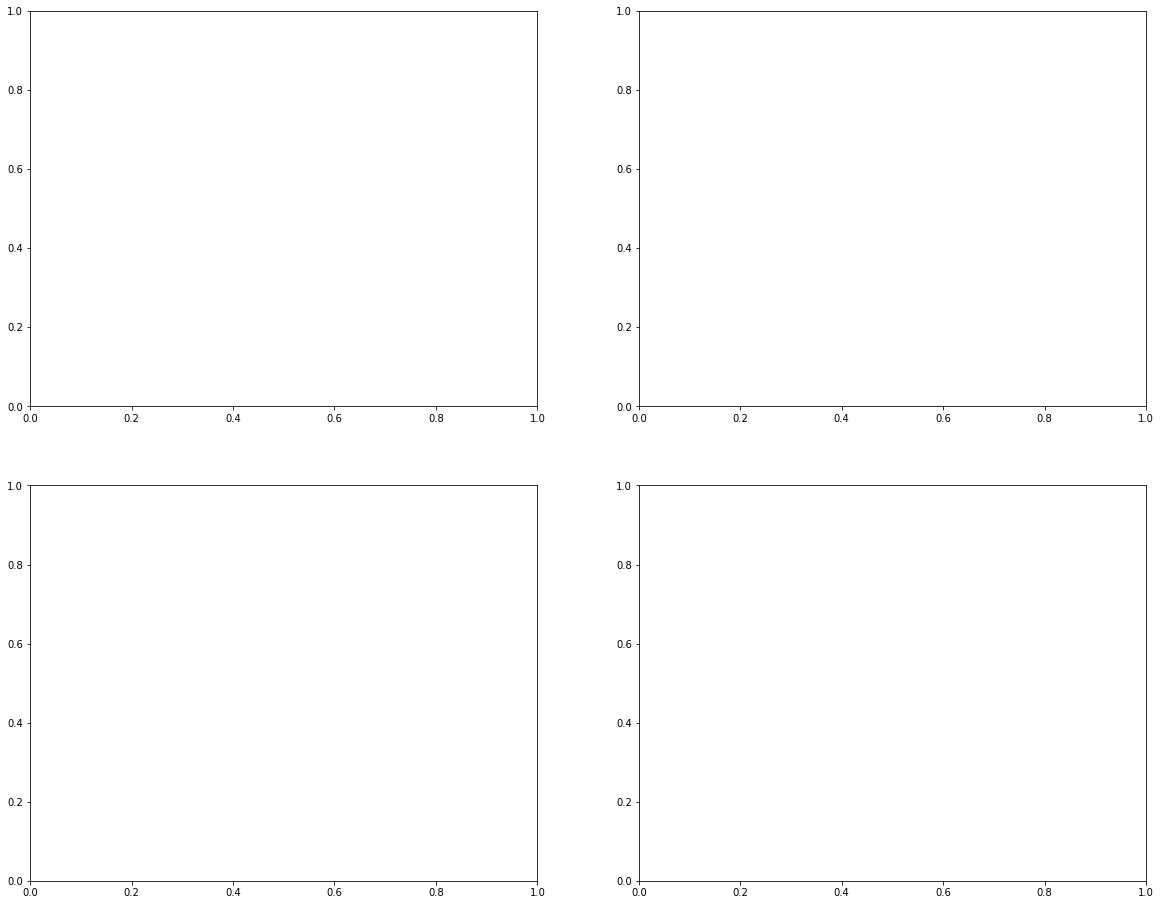

In [ ]:
#Grafico de desempenho no mapa brasileiro
fig, ax= plt.subplots(2,2, figsize=(20,16))
juntando.plot.scatter(y='latitude',x='longitude', 
                      c=juntando['NU_NOTA_CN'], 
                      cmap='RdYlGn',
                       title='Ciências da Natureza', ax=ax[0,1])
juntando.plot.scatter(y='latitude',x='longitude', 
                      c=juntando['NU_NOTA_CH'], 
                      cmap='RdYlGn',
                      title='Ciências Humanas', ax=ax[1,0])
juntando2.plot.scatter(y='latitude',x='longitude', 
                      c=juntando2['NU_NOTA_LC'], 
                      cmap='RdYlGn',
                      title='Linguagens e Códigos', ax=ax[0,0])
juntando2.plot.scatter(y='latitude',x='longitude', 
                      c=juntando2['NU_NOTA_MT'], 
                      cmap='RdYlGn',
                      title='Matemática', ax=ax[1,1])

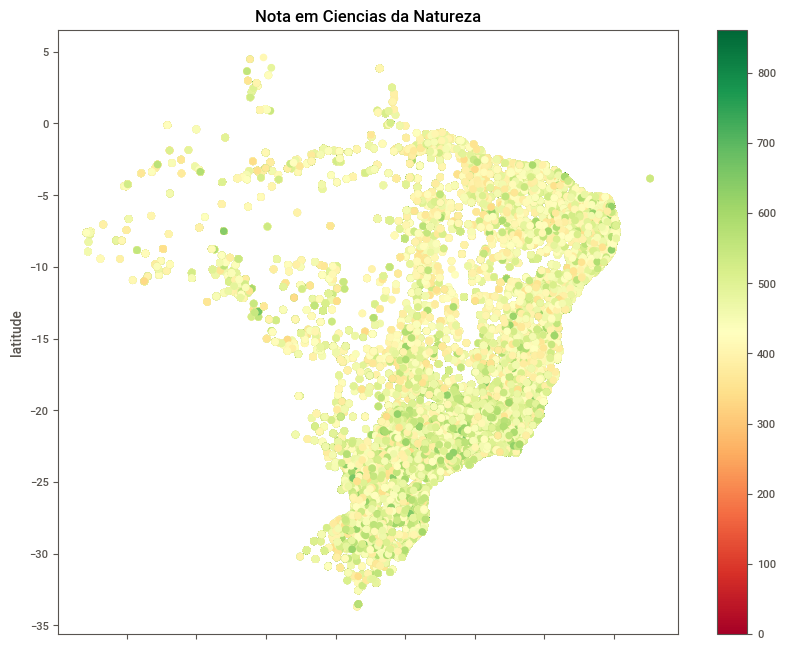

In [ ]:
juntando.plot.scatter(y='latitude',x='longitude', 
                      c=juntando['NU_NOTA_CN'], 
                      cmap='RdYlGn',
                      figsize=(10,8), title='Nota em Ciencias da Natureza')

####Analise exploratoria automatizada

In [ ]:
!pip install pandas-profiling==2.8.0

In [ ]:
from pandas_profiling import profile_report

In [ ]:
azulD1.profile_report()

In [ ]:
azulD2.profile_report()

####Sweetviz

In [ ]:
!pip install sweetviz

In [ ]:
#Import sweetviz library
import sweetviz as xx

In [ ]:
#Analisando os dados do banco azul segundo dia
study_report = xx.analyze(azulD1)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#Gerar relatório
study_report.show_html('Dados_banco_azulD1.html')

Report Dados_banco_azul1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Analisando os dados do banco azul primeiro dia
study_report = xx.analyze(azulD2)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#Gerar relatório
study_report.show_html('Dados_banco_azulD2.html')

Report Dados_banco_azul2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##Treino e teste

####Seleção

In [ ]:
p = 0.8 # fracao de elementos no conjunto de treinamento

#Primeiro dia
D1_train, D1_test = train_test_split(azulD1, 
                                      train_size = p, 
                                      random_state = 42)

#Segundo dia
D2_train, D2_test = train_test_split(azulD2, 
                                      train_size = p, 
                                      random_state = 42)

#####Salvando no Drive

In [ ]:
#Separar num .CSV e salvar no drive
D1_test.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/test_D1.csv')
D1_train.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/train_D1.csv')

In [ ]:
D2_test.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/test_D2.csv')
D2_train.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/train_D2.csv')

###Separando em área de conhecimento

Separando as respostas de cada área que conhecimento, que é o que vai ser usado para modelagem em breve.

In [ ]:
#Linguagem
LC_test = D1_test.filter(items=['TX_RESPOSTAS_LC'])
LC_train = D1_train.filter(items=['TX_RESPOSTAS_LC'])

In [ ]:
#Ciencias humanas
CH_test = D1_test.filter(items=['TX_RESPOSTAS_CH'])
CH_train = D1_train.filter(items=['TX_RESPOSTAS_CH'])

In [ ]:
#Ciencias naturais
CN_test = D2_test.filter(items=['TX_RESPOSTAS_CN'])
CN_train = D2_train.filter(items=['TX_RESPOSTAS_CN'])

In [ ]:
#Matematica
MT_test = D2_test.filter(items=['TX_RESPOSTAS_MT'])
MT_train = D2_train.filter(items=['TX_RESPOSTAS_MT'])

#####Salvando no Drive

In [ ]:
#Separar num .CSV e salvar no drive
CN_test.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CN_test.csv')
CN_train.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CN_train.csv')

CH_test.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CH_test.csv')
CH_train.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CH_train.csv')

LC_test.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/LC_test.csv')
LC_train.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/LC_train.csv')

MT_test.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/MT_test.csv')
MT_train.to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/MT_train.csv')

##Respostas

In [ ]:
##Criando função que retorna as respostas no formato desejado
def resp(df, area):
  matriz = []                                  #matriz auxiliar
  local='TX_RESPOSTAS_' + area       

  for i in df[local]:                          #separando cada item da resposta e colocando na matriz
    matriz.append(list(i))

  csv_respostas = pd.DataFrame(matriz)         #transformando em .csv
  csv_respostas.to_csv('csv_respostas.csv')

  local2='TX_GABARITO_' + area

  gabarito = list(df[local2][0])                #selecionando o gabarito
  V_F = (csv_respostas == gabarito)            #igualando o gabarito as respostas o que nos da uma matriz de V/F

  csv_VF = pd.DataFrame(V_F)                   #transformando em .csv

  return csv_VF

###Salvando no Drive

In [ ]:
train_D1= pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/train_D1.csv")
test_D1= pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/test_D1.csv")

train_D2= pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/train_D2.csv")
test_D2= pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/test_D2.csv")

In [ ]:
resp(train_D1,'LC')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,True,False,True,True,True,False,False,False,False,False,False,True,True,True,False,True,True,False,True,True,True,True,True,True,True,False,True,True,True,False,False,False,True,True,True,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,True
2,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True,True,True,True,False,False,True,True,True,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632536,False,False,False,False,False,False,True,True,True,True,False,True,True,False,False,True,True,False,True,False,True,True,False,True,True,True,False,False,True,False,True,True,True,False,True,True,True,True,False,True,True,True,False,False,False,True,False,True,True,False
632537,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
632538,False,False,False,False,False,False,False,True,False,True,True,False,True,True,False,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False
632539,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,True,False,False


In [ ]:
#LC
resp(train_D1,'LC').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/LC_train_VF.csv')
resp(test_D1,'LC').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/LC_test_VF.csv')

In [ ]:
#CH
resp(train_D1,'CH').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CH_train_VF.csv')
resp(test_D1,'CH').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CH_test_VF.csv')

In [ ]:
#CN
resp(train_D2,'CN').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CN_train_VF.csv')
resp(test_D2,'CN').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/CN_test_VF.csv')

In [ ]:
#MT
resp(train_D2,'MT').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/MT_train_VF.csv')
resp(test_D2,'MT').to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/MT_test_VF.csv')

###Salvando em código binário

Faremos a modelagem tambem pelo MIRT no R, que, ao contrário do GIRT, exige que os valores sejam binários. Assim salvaremos também as respostas no formato binário.

In [ ]:
#MT
(resp(train_D2,'MT')*1).to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/MT_train_01.csv')
(resp(test_D2,'MT')*1).to_csv('/content/drive/Shareddrives/IC_Edu_Julie/Dados/MT_test_01.csv')

In [ ]:
lD2.columns = ['nada','136', '137', '138','139',
               '140', '141', '142', '143', '144', '145', '146', '147', '148', '149',
               '150', '151', '152', '153', '154', '155', '156', '157', '158', '159',
               '160', '161', '162', '163', '164', '165', '166', '167', '168', '169',
               '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180']